In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import the required libraries first

In [30]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Read the csv file. Here the dataset is about the census income which shows the occupancy, income, gender and income

In [31]:
df.shape

(32560, 15)

In [32]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Need to check the null values present in the dataset. Here in this data there is no null values therefore we can proceed the further

In [34]:
LE = LabelEncoder()
df['Income'] = LE.fit_transform(df ['Income'])

We have used the labelencoder to convert the data Income into numerical data.

In [35]:
df.info

<bound method DataFrame.info of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   

In [36]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


Numerical Columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']


We have to check the categorical data and numerical data from the dataset. As we have to convert the required categorical data into numerical data for the prediction

In [37]:
df.drop(['Relationship'], axis=1, inplace=True)

In [38]:
df.drop(['Race'], axis=1, inplace=True)

In [39]:
df.drop(['Sex'], axis=1, inplace=True)

In [40]:
df.drop(['Native_country'], axis=1, inplace=True)

In [41]:
df.drop(['Occupation'], axis=1, inplace=True)

In [42]:
df.drop(['Marital_status'], axis=1, inplace=True)

In [43]:
df.drop(['Workclass'], axis=1, inplace=True)

In [44]:
df.drop(['Education'], axis=1, inplace=True)

In [45]:
df.drop(['Age'], axis=1, inplace=True)

We will drop the unnecessary data from the dataset so that we can reduce the unwanted data from the set so we can predict the correct values

In [46]:
df=pd.get_dummies(df).astype(int)
df.head()

,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,83311,13,0,0,13,0
1,215646,9,0,0,40,0
2,234721,7,0,0,40,0
3,338409,13,0,0,40,0
4,284582,14,0,0,40,0


Create the dummy of the dataset so that we can convert all the categorical data into the numerical data

In [47]:
df.skew()

Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [48]:
df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])

In [49]:
df['Capital_gain'] = np.cbrt(df['Capital_gain'])

In [50]:
df['Capital_loss'] = np.cbrt(df['Capital_loss'])

In [53]:
df.skew()

Fnlwgt           -0.164177
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Income            1.212383
dtype: float64

In [54]:
df['Capital_gain'] = np.cbrt(df['Capital_gain'])

In [55]:
df['Capital_loss'] = np.cbrt(df['Capital_loss'])

Reduce the skewness from the dataset to predict the target variables nearby the original data

<AxesSubplot:>

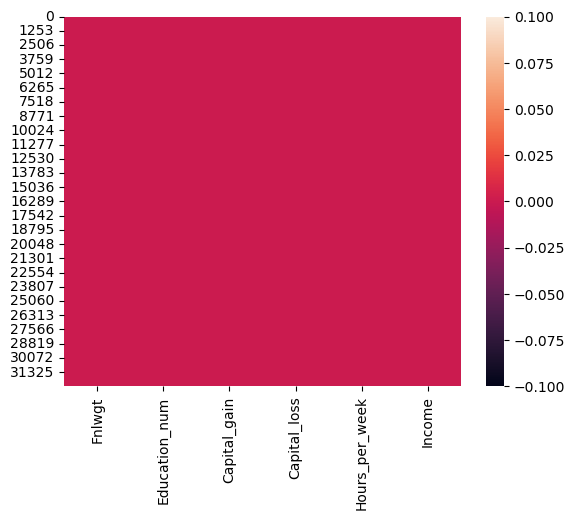

In [56]:
sns.heatmap(df.isnull())

Create the heatmap from the dataset

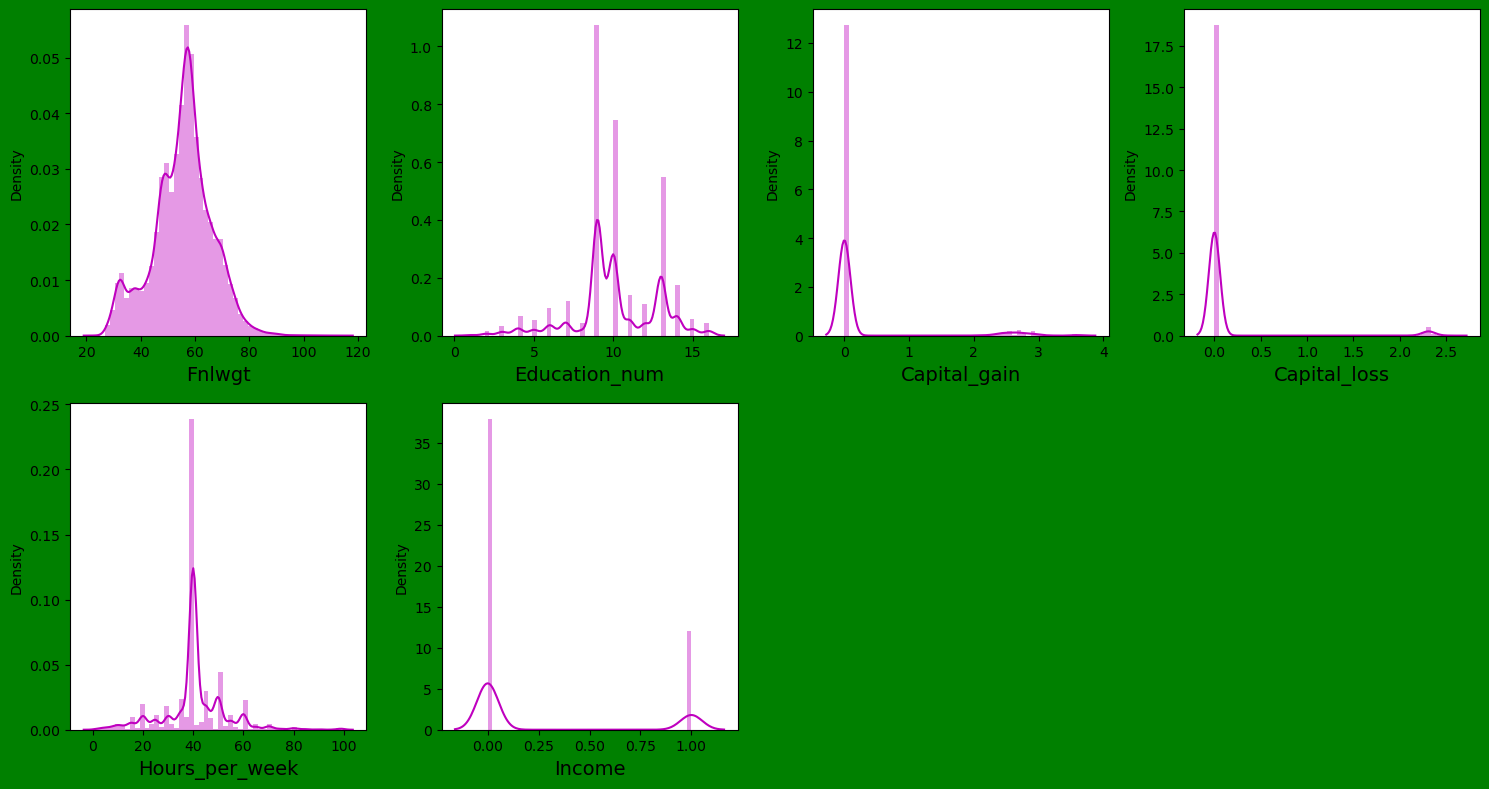

In [57]:
plt.figure(figsize=(15,8), facecolor= "green")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the distplot for the dataset to verify the skewness of the data. We can reduce the skewness from the dataset

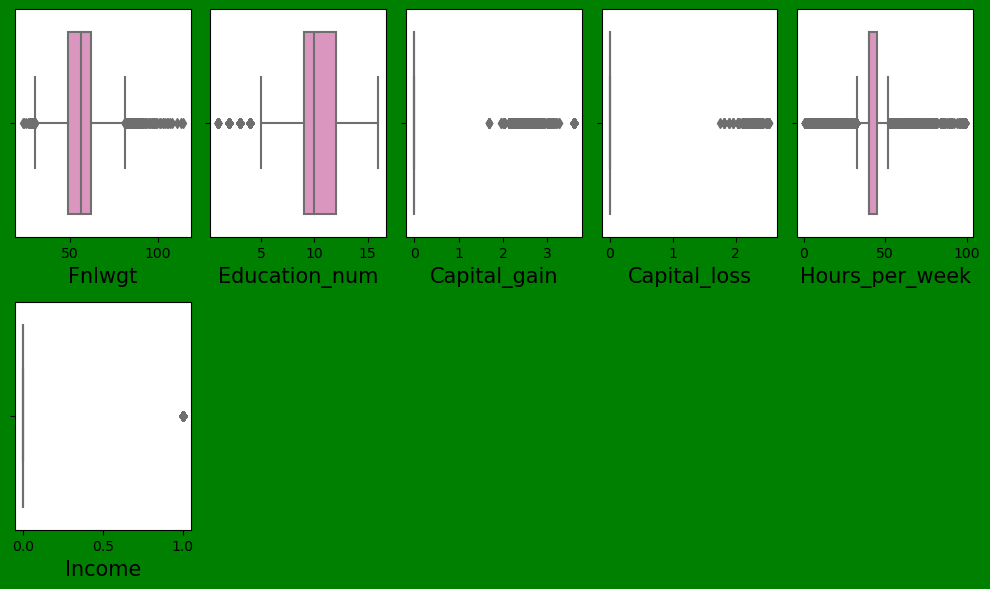

In [58]:
plt.figure(figsize=(10,6), facecolor= 'green')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Boxplot is created with the dataset.

In [59]:
cor= df.corr()
cor

,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Fnlwgt,1.000000,-0.040712,-0.002031,-0.005922,-0.022684,-0.004462
Education_num,-0.040712,1.000000,0.128943,0.077027,0.148127,0.335182
Capital_gain,-0.002031,0.128943,1.000000,-0.066146,0.083614,0.288865
Capital_loss,-0.005922,0.077027,-0.066146,1.000000,0.051127,0.140690
Hours_per_week,-0.022684,0.148127,0.083614,0.051127,1.000000,0.229690
Income,-0.004462,0.335182,0.288865,0.140690,0.229690,1.000000


Here we are checking the correlation of the dataset using the code

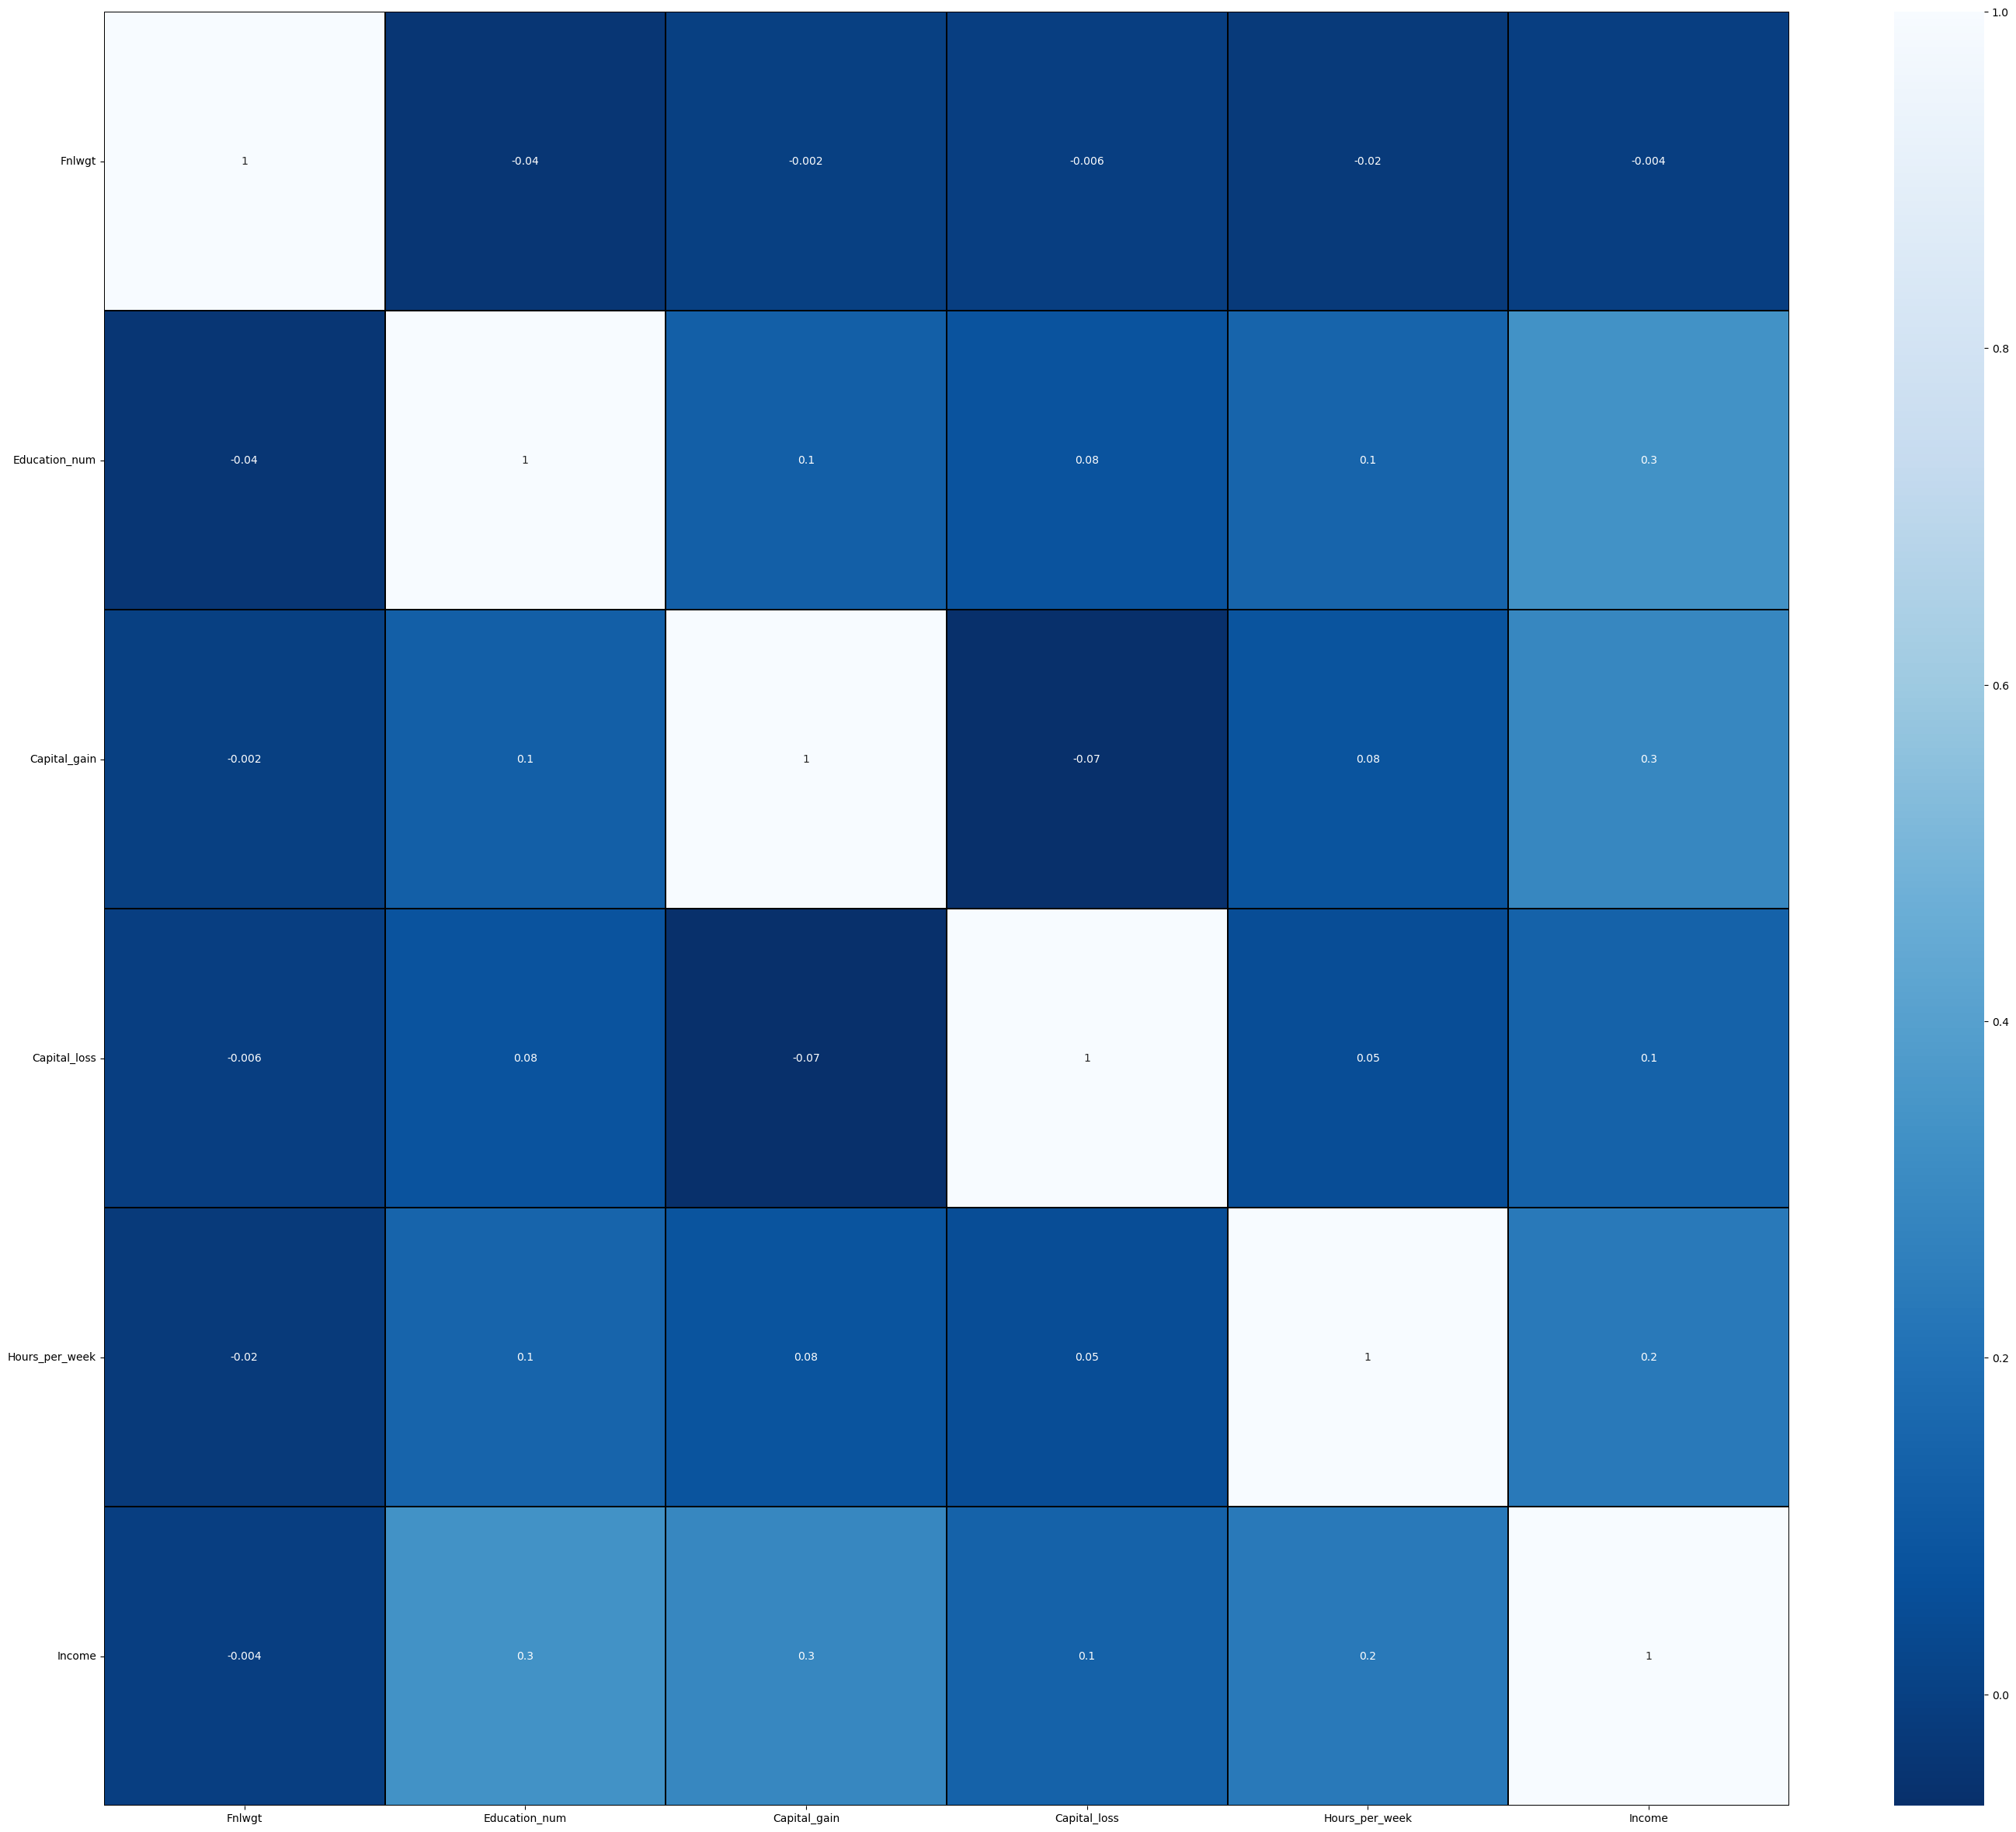

In [60]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Heatmap is created from the dataset to verify the correlation between the data

In [61]:
y=df['Income']
x=df.drop('Income',axis=1)

Here we have drop the target variable in x axis

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [64]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.7836302211302212
[[4263  649]
 [ 760  840]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4912
           1       0.56      0.53      0.54      1600

    accuracy                           0.78      6512
   macro avg       0.71      0.70      0.70      6512
weighted avg       0.78      0.78      0.78      6512



In [65]:
GB=GradientBoostingClassifier() 
GB.fit(X_train, y_train)
predGB=GB.predict(X_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8300061425061425
[[4698  214]
 [ 893  707]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4912
           1       0.77      0.44      0.56      1600

    accuracy                           0.83      6512
   macro avg       0.80      0.70      0.73      6512
weighted avg       0.82      0.83      0.81      6512



In [66]:
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train) 
predET=ET.predict(X_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.774416461916462
[[4217  695]
 [ 774  826]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4912
           1       0.54      0.52      0.53      1600

    accuracy                           0.77      6512
   macro avg       0.69      0.69      0.69      6512
weighted avg       0.77      0.77      0.77      6512



Created the various models for the dataset to predict the target variable

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [69]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [70]:
import joblib
joblib.dump(ET,"Income.pkl")

['Income.pkl']

In [71]:
model = joblib.load("Income.pkl")
prediction = model.predict(X_test)
prediction

array([0, 0, 1, ..., 0, 1, 1])

In [72]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,0,1
4,1,0
...,...,...
6507,0,1
6508,0,0
6509,0,0
6510,1,0


Finally predicted the target variable which is income. Prediction is almost the nearby the original variable.